In [38]:
# e) On Day 20 we add a new user source. From then on, we get 12,000 users from the original 
# source and 8,000 from this new one. The new users' retention is described by these formulas. 
# With this mix of old and new users, which variant makes more total money by Day 30? 


# First of all, the necessary libraries imported to the notebook.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def retention_curve(d1, d3, d7, d14, maximum=30):
    # Calculating retention points with log-linear interpolation for not known days (From D0 to D14) 
    known_days = np.array([0,1,3,7,14])
    reten_rates = ([1.0, d1, d3, d7, d14])
    reten_days = np.arange(0, maximum + 1)
    log_reten_known = np.log(reten_rates)
    log_reten_days = np.interp(reten_days, known_days, log_reten_known)
    reten_back  = np.exp(log_reten_days)
    
    # After D14 
    slope = (np.log(d14) - np.log(d7)) / 7
    for day in range(15, maximum + 1):
        reten_back[day] = np.exp(np.log(d14) + slope * (day - 14))
    
    return pd.Series(reten_back, index=reten_days, name="retention")


# The question asks for total money by DAY 30, so we use same logic at the below piece of code that is programmed in the "retention_curve.ipynb".
A = retention_curve(0.53, 0.27, 0.17, 0.06, maximum=30)
B = retention_curve(0.48, 0.25, 0.19, 0.09, maximum=30)

I divided the problem into two parts. The first part is needs to be calculated between D0-D20 Ad revenue and purchasing revenue. After that, the new source comes in on Day 20 and the trick is 12.000 of them stays with the original retention, but the 8.000 of them needs to be calcualated again with the new Retention Function. Now, Let it be the first part calculated.   

In [71]:
# This piece of code programms the two parts of daily active users : D0-D14 and D26-D30 
installs = 20000

A_dau_19 = installs * A.cumsum().loc[0:19]
B_dau_19 = installs * B.cumsum().loc[0:19]

print("Daily active users between D0-D20 for Variant A: ", round(A_dau_20.loc[19]), "\n")
print("Daily active users between D0-D20 for Variant B: ", round(B_dau_20.loc[19]))

Daily active users between D0-D20 for Variant A:  77517 

Daily active users between D0-D20 for Variant B:  82788


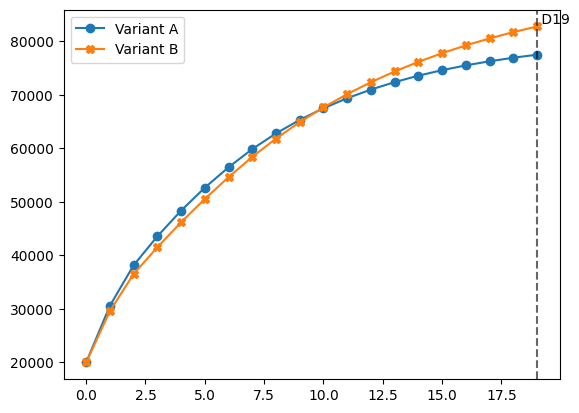

In [72]:
plt.plot(A_dau_19.index, A_dau_19.values, marker="o", label="Variant A")
plt.plot(B_dau_19.index, B_dau_19.values, marker="X", label="Variant B")
plt.axvline(19, linestyle="--", color="black", alpha=0.6)
plt.text(19, B_dau_19.loc[19], " D19", va="bottom", ha="left")
plt.legend()
plt.show()

Retention points of Variant B is higher than Variant A and this leads more in-game purchasing for Variant B. 

In [73]:
# Calculating Daily Purchase Revenue: DPR = A(DAU(t)) * daily purchase ratio * $1
A_purch_ratio = 0.0305
B_purch_ratio = 0.0315 

A_DPR_19 = A_dau_19 * A_purch_ratio * 1
B_DPR_19 = B_dau_19 * B_purch_ratio * 1

print("Between D0-D19 Variant A purchase revenue will be: ", round(sum(A_DPR_19)), "\n")
print("Between D0-D19 Variant B purchase revenue will be: ", round(sum(B_DPR_19)))

Between D0-D19 Variant A purchase revenue will be:  36985 

Between D0-D19 Variant B purchase revenue will be:  38653


In [74]:
# Calculating Ad Revenue(t)= (AD Impresssion/DAU) * eCPM * DAU(t) by Day 30
A_eCPM = 9.80
B_eCPM = 10.80

A_Ad_DAU = 2.3
B_Ad_DAU = 1.6

A_Ad_Revenue_19 = A_Ad_DAU * (A_eCPM / 1000) * A_dau_19
B_Ad_Revenue_19 = B_Ad_DAU * (B_eCPM / 1000) * B_dau_19

print("The Ad Revenue for Variant A by D0-D19 is: ", round(sum((A_Ad_Revenue_19))), "\n")
print("The Ad Revenue for Variant B is D0-D19 is: ", round(sum(((B_Ad_Revenue_19)))))

The Ad Revenue for Variant A by D0-D19 is:  27333 

The Ad Revenue for Variant B is D0-D19 is:  21204


In [75]:
A_total_money_19 = sum(A_Ad_Revenue_19) + sum(A_DPR_19)
B_total_money_19 = sum(B_Ad_Revenue_19) + sum(B_DPR_19)

print("Total revenue from Ad + Purchasing by Day 19 from Variant A is : ", round(A_total_money_19), "\n")
print("Total revenue from Ad + Purchasing by Day 19 from Variant B is : ", round(B_total_money_19))

Total revenue from Ad + Purchasing by Day 19 from Variant A is :  64318 

Total revenue from Ad + Purchasing by Day 19 from Variant B is :  59857


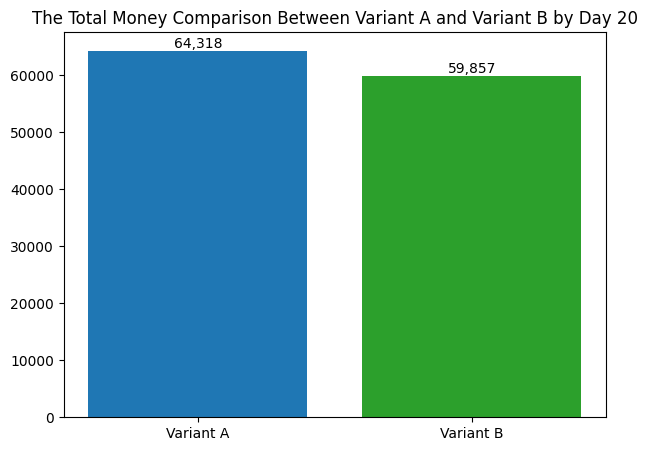

In [76]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:blue', 'tab:green']
plt.bar(["Variant A", "Variant B"], [A_total_money_19, B_total_money_19], color=bar_colors)
plt.title("The Total Money Comparison Between Variant A and Variant B by Day 20")
plt.text(0, A_total_money_19, f"{A_total_money_19:,.0f}", ha="center", va="bottom")
plt.text(1, B_total_money_19, f"{B_total_money_19:,.0f}", ha="center", va="bottom")
plt.show()

For the second part's first action will be to calculate 12.000 users revenue with old source and old model for D20-D30.

In [77]:
installs_new_20_30 = 12000

A_dau_20_30 = installs_new_20_30 * A.cumsum().loc[20:30]
B_dau_20_30 = installs_new_20_30 * B.cumsum().loc[20:30]

print("Daily active users between D20-D30 for Variant A: ", round(A_dau_20_30.loc[30]), "\n")
print("Daily active users between D20-D30 for Variant B: ", round(B_dau_20_30.loc[30]))

Daily active users between D20-D30 for Variant A:  48228 

Daily active users between D20-D30 for Variant B:  53557


In [78]:
# Calculating Daily Purchase Revenue: DPR = A(DAU(t)) * daily purchase ratio * $1
A_purch_ratio = 0.0305
B_purch_ratio = 0.0315 

A_DPR_20_30 = A_dau_20_30 * A_purch_ratio * 1
B_DPR_20_30 = B_dau_20_30 * B_purch_ratio * 1

print("Between D20-D30 Variant A purchase revenue will be: ", round(sum(A_DPR_20_30)), "\n")
print("Between D20-D30 Variant B purchase revenue will be: ", round(sum(B_DPR_20_30)))

Between D20-D30 Variant A purchase revenue will be:  15993 

Between D20-D30 Variant B purchase revenue will be:  18073


In [79]:
# Calculating Ad Revenue(t)= (AD Impresssion/DAU) * eCPM * DAU(t) by Day 30
A_eCPM = 9.80
B_eCPM = 10.80

A_Ad_DAU = 2.3
B_Ad_DAU = 1.6

A_Ad_Revenue_20_30 = A_Ad_DAU * (A_eCPM / 1000) * A_dau_20_30
B_Ad_Revenue_20_30 = B_Ad_DAU * (B_eCPM / 1000) * B_dau_20_30

print("The Ad Revenue for Variant A by D20-D30 is: ", round(sum((A_Ad_Revenue_20_30))), "\n")
print("The Ad Revenue for Variant B is D20-D30 is: ", round(sum(((B_Ad_Revenue_20_30)))))

The Ad Revenue for Variant A by D20-D30 is:  11819 

The Ad Revenue for Variant B is D20-D30 is:  9915


In [80]:
A_total_money_20_30 = sum(A_Ad_Revenue_20_30) + sum(A_DPR_20_30)
B_total_money_20_30 = sum(B_Ad_Revenue_20_30) + sum(B_DPR_20_30)

print("Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant A is : ", round(A_total_money_20_30), "\n")
print("Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant B is : ", round(B_total_money_20_30))

Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant A is :  27813 

Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant B is :  27988


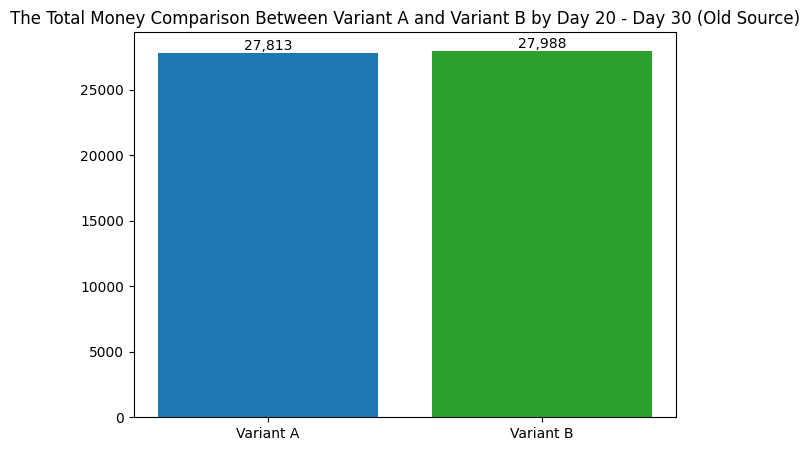

In [81]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:blue', 'tab:green']
plt.bar(["Variant A", "Variant B"], [A_total_money_20_30, B_total_money_20_30], color=bar_colors)
plt.title("The Total Money Comparison Between Variant A and Variant B by Day 20 - Day 30 (Old Source)")
plt.text(0, A_total_money_20_30, f"{A_total_money_20_30:,.0f}", ha="center", va="bottom")
plt.text(1, B_total_money_20_30, f"{B_total_money_20_30:,.0f}", ha="center", va="bottom")
plt.show()

From this point, we have to set the new retention formula for the second part. The new model is:

Ra(x) = 0.58 * e ^ -12(x - 1), a = 0, 1, 2, 3 ... 30) ---> for Variant A

Ra(x) = 0.52 * e ^ -10(x - 1), a = 0, 1, 2, 3 ... 30) ---> for Variant B

One thing I realize that I choose the same the mathematical model with this questions new model. However, for calculating the not known retention points, I log-linear interpolated the formula which is highly influenced from an artical of pure mathematics problem by Markus Deserno, "Linear and Logarithmic Interpolation", Max-Planck-Institut für Polymerforschung. (Dated: March 24, 2004).


In [82]:
import math 
def new_retention_curve(base, k, maximum=30):
    # This time np.zeros() matrix will be used. This method creates zero matrix with given size as(row,col)   
    days = np.arange(0, maximum + 1) # Keeping indices for pd.series
    reten_new = np.zeros(maximum + 1)
    reten_new[0] = 1 # The assumption of first days' retention. We did same the same assumption for old source's retention curve begining of this work.
    for x in range(1, maximum + 1):
        # The base of the formula should be a parameter that one can easily enter the number. The other parameter should be k which represents for slowing rate. 
        # base : base ration for the formula
        # k : slowing rate 
        # x : Input place for the day(s)
        reten_new[x] = base * math.exp(-k * (x - 1)) # Constructing the formula, benefiting from NumPy library for that.
    return pd.Series(reten_new, index=days, name="retention")

This time, I will not use log-linear interpolation for the not known days. The necessary days' retention points will be calculated through the new formula. The reason for this, at the beginning of this work, we did not have the exponential formula. Several retention points were known and we had to figure out the other ones.

In [95]:
# Calculating New Retention Points from second parts formula in order to calculate new source's revenue
reten_new_A = new_retention_curve(base=0.58, k=0.12, maximum=30)
reten_new_B = new_retention_curve(base=0.52, k=0.10, maximum=30)

In [85]:
installs_new_20_30 = 8000

A_dau_20_30_new = installs_new_20_30 * reten_new_A.cumsum().loc[20:30]
B_dau_20_30_new = installs_new_20_30 * reten_new_B.cumsum().loc[20:30]

print("Daily active users between D20-D30 for Variant A: ", round(A_dau_20_30_new.loc[30]), "\n")
print("Daily active users between D20-D30 for Variant B: ", round(B_dau_20_30_new.loc[30]))

Daily active users between D20-D30 for Variant A:  47912 

Daily active users between D20-D30 for Variant B:  49538


In [86]:
# Calculating Daily Purchase Revenue: DPR = A(DAU(t)) * daily purchase ratio * $1
A_purch_ratio = 0.0305
B_purch_ratio = 0.0315 

A_DPR_20_30_new = A_dau_20_30_new * A_purch_ratio * 1
B_DPR_20_30_new = B_dau_20_30_new * B_purch_ratio * 1

print("Between D20-D30 Variant A purchase revenue will be: ", round(sum(A_DPR_20_30_new)), "\n")
print("Between D20-D30 Variant B purchase revenue will be: ", round(sum(B_DPR_20_30_new)))

Between D20-D30 Variant A purchase revenue will be:  15715 

Between D20-D30 Variant B purchase revenue will be:  16613


In [87]:
# Calculating Ad Revenue(t)= (AD Impresssion/DAU) * eCPM * DAU(t) by Day 30
A_eCPM = 9.80
B_eCPM = 10.80

A_Ad_DAU = 2.3
B_Ad_DAU = 1.6

A_Ad_Revenue_20_30_new = A_Ad_DAU * (A_eCPM / 1000) * A_dau_20_30_new
B_Ad_Revenue_20_30_new = B_Ad_DAU * (B_eCPM / 1000) * B_dau_20_30_new

print("The Ad Revenue for Variant A by D20-D30 is: ", round(sum((A_Ad_Revenue_20_30_new))), "\n")
print("The Ad Revenue for Variant B is D20-D30 is: ", round(sum(((B_Ad_Revenue_20_30_new)))))

The Ad Revenue for Variant A by D20-D30 is:  11613 

The Ad Revenue for Variant B is D20-D30 is:  9113


In [88]:
A_total_money_20_30_new = sum(A_Ad_Revenue_20_30_new) + sum(A_DPR_20_30_new)
B_total_money_20_30_new = sum(B_Ad_Revenue_20_30_new) + sum(B_DPR_20_30_new)

print("Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant A is : ", round(A_total_money_20_30_new), "\n")
print("Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant B is : ", round(B_total_money_20_30_new))

Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant A is :  27328 

Total revenue from Ad + Purchasing by Day 20 - Day 30 from Variant B is :  25726


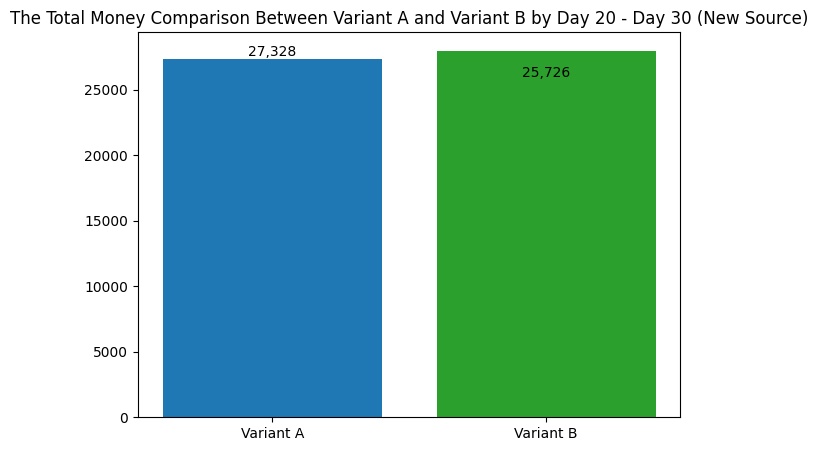

In [94]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:blue', 'tab:green']
plt.bar(["Variant A", "Variant B"], [A_total_money_20_30_new, B_total_money_20_30], color=bar_colors)
plt.title("The Total Money Comparison Between Variant A and Variant B by Day 20 - Day 30 (New Source)")
plt.text(0, A_total_money_20_30_new, f"{A_total_money_20_30_new:,.0f}", ha="center", va="bottom")
plt.text(1, B_total_money_20_30_new, f"{B_total_money_20_30_new:,.0f}", ha="center", va="bottom")
plt.show()

In [97]:
# Comparison Variant A and Variant B for this question

TOTAL_A = round(A_total_money_20_30_new) + round(A_total_money_20_30) + round(A_total_money_19)
TOTAL_B = round(B_total_money_20_30_new) + round(B_total_money_20_30) + round(B_total_money_19)

print("The Grand total revenue of this question for Variant A is: ", TOTAL_A)
print("The Grand total revenue of this question for Variant B is: ", TOTAL_B, "\n")

if TOTAL_A > TOTAL_B:
    print("Variant A will earn more money than Variant B")
else:
    print("Variant B will earn more money than Variant A")

The Grand total revenue of this question for Variant A is:  119459
The Grand total revenue of this question for Variant B is:  113571 

Variant A will earn more money than Variant B


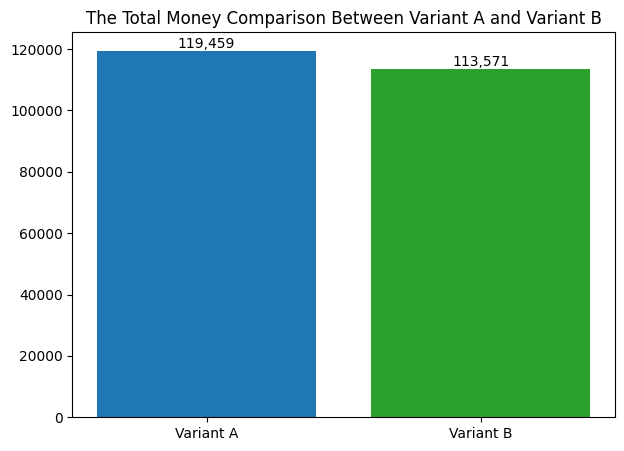

In [99]:
plt.figure(figsize=(7,5))
bar_colors = ['tab:blue', 'tab:green']
plt.bar(["Variant A", "Variant B"], [TOTAL_A, TOTAL_B], color=bar_colors)
plt.title("The Total Money Comparison Between Variant A and Variant B")
plt.text(0, TOTAL_A, f"{TOTAL_A:,.0f}", ha="center", va="bottom")
plt.text(1, TOTAL_B, f"{TOTAL_B:,.0f}", ha="center", va="bottom")
plt.show()

In this scenario, again, Variant A will earn more money than Variant B. Nearly all of the scenarios, Variant A was winning from the Ad purchasing and Variant B was winning for In-Game purchasing. Because Variant B has more Daily Active User (reminder for retention points) and this leads naturally more purchasing. Although, we should keep going with Variant A because it looks like Ad purchasing earns more than in-game purchasing.